# Домашнее задание по предмету "Разведочный анализ. Продолжение"

Выбранный датасет: Online Shoppers Purchasing Intention Dataset

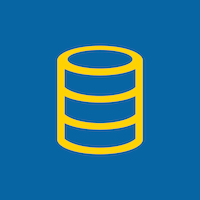

# 1.Общее исследование данных

Цель шага:

* Проверить:

  1.   Размеры таблицы;
  2.   Число столбцов;
  3.   Количество пропусков в столбцах.





In [2]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# Подзагрузка датасета Shoppers
SHOPPERS_DATASET = 'https://raw.githubusercontent.com/metanovus/ai_edu_repo/main/online_shoppers_intention.csv'

In [58]:
df = pd.read_csv(SHOPPERS_DATASET)

## Описание данных



*   `Administrative`, `Informational`, `Product Related` - различные типы страниц, посещённые посетителями;

*   `Administrative Duration`, `Informational Duration`, `Product Related Duration` - общее время, проведенное на каждой из этих категорий страниц;

* `Special Day` - указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией;

* `Operating Systems` - тип операционный системы (целое число);

* `Region` - код региона;

* `Traffic Type` - тип траффика;

* `Visitor Type` - категория посетителя (постоянный, новичок или прочее);

* `Weekend` - булево значение, указывающее на выходной день;

* `Revenue` - булево значение, указывающее на то, что был получен доход.

Показатели, измеренные Google Analytics для каждой страницы сайта электронной торговли:

* `Bounce Rate` - расчет количества отказов по отношению к общему количеству просмотров страницы;

* `Exit Rate` - определяется числом людей, покинувших сайт после перехода на страницу, и сравнивается с общим количеством просмотров, полученных страницей;

* `Page Value` - среднее значение страницы, которую посетил пользователь перед тем, как перейти на целевую страницу или завершить транзакцию электронной торговли (или и то, и другое).


In [ ]:
# Пример данных (первые 10 значений датасета)
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.025141,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
# Хвост таблицы
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


## Исследование данных

Размер датасета

In [ ]:
shape = df.shape

f'Количество строк (записей): {shape[0]}, количество столбцов: {shape[1]}'

'Количество строк (записей): 12330, количество столбцов: 18'

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Основные числовые характеристики

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# 2.Однофакторный анализ

Цели:

1.   По каждому столбцу посмотреть его распределение;
2.   Обработать пропуски и ошибочные значения;
3.   Посмотреть связь с целевой переменной.


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

если пропусков много - можно удалить столбец

можно пытаться предсказывать пропуски моделью

In [77]:
# Через метод библиотеки pandas выведем на экран те столбцы, которые имеют пропуски
check_null = df.isnull().mean() * 100

check_null[check_null > 0]

Series([], dtype: float64)

Имеем следующее:

*   Столбец "Informational Duration" имеет около 1.6% пропусков;
*   Столбец "Product Related Duration" имеет около 4% пропусков;
*   Столбец "ExitRates" имеет около 0.8% пропусков.

In [76]:
# Так как у нас везде пустых значений менее 5%, то заполним пропуски медианным значением.
median_inf_duration = df.Informational_Duration.median()
median_prod_rel_duration = df.ProductRelated_Duration.median()
median_exit_rates = df.ExitRates.median()

df.Informational_Duration.fillna(median_inf_duration, inplace=True)
df.ProductRelated_Duration.fillna(median_prod_rel_duration, inplace=True)
df.ExitRates.fillna(median_exit_rates, inplace=True)

## Построение гистограммы, определение типа распределения

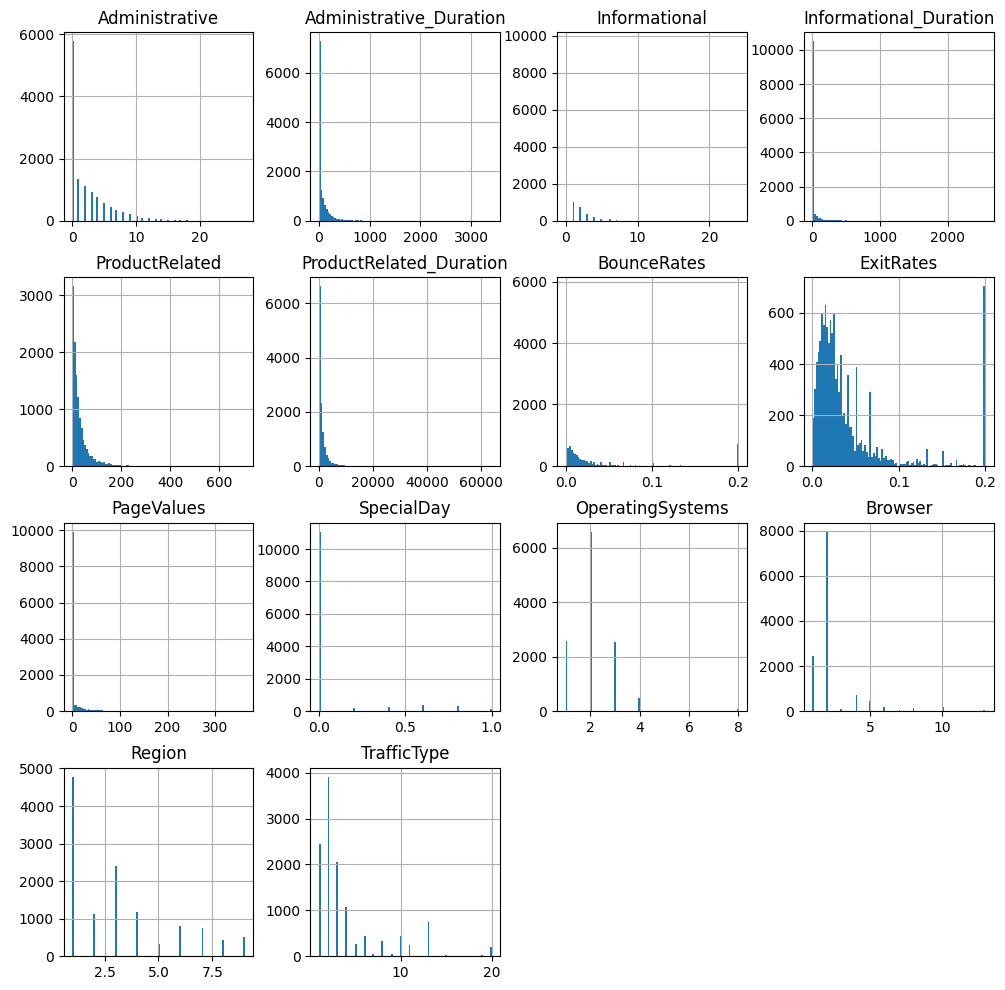

In [ ]:
# Построим гистограмму для каждого столбца и определим тип распределения
df.hist(bins=100, figsize=(12,12));

Эмпирически имеем следующее:


1.   Большинство столбцов имеет Логонормальное распределение;
2.   Практически каждый столбец имеет выбросы.


## Связь с целевой переменной

В качестве целевой переменной возьмём показатель отказов `Bounce Rates` - процентное соотношение количества посетителей, покинувших сайт прямо со страницы входа или просмотревших не более одной страницы сайта.

`Bounce Rates` может быть полезным показателем для оценки пользы и привлекательности веб-сайтов для посетителей, а так же эффективности конкретных страниц.

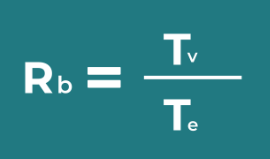

*Rb* - `Bounce Rates`,
*Tv* - число посещений с просмотром одной страницы,
*Te* - общее число посещений одной страницы.

Показатель отказов - процент посетителей, которые покинули сайт прямо со страницы входа, то есть посмотрели не более одной страницы.

Почему показатель отказов имеет значение?


* Во-первых, это влияет на рейтинг страницы в поиске. Поисковые системы учитывают показатель отказов при ранжировании. И чем выше bounce rate, тем ниже будет рейтинг.

* Во-вторых, отказы демонстрируют, насколько контент на вашей странице релевантен запросам пользователей. Или она привлекательна и удобна для них. Отсюда выходит и следующий аргумент в пользу того, что за показателем отказов стоит следить — это маркер качества сайта.

<Axes: xlabel='BounceRates', ylabel='Count'>

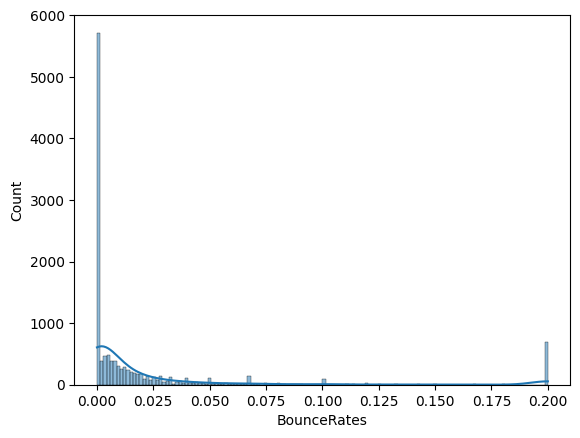

In [63]:
# Построим гистограмму нашей целевой переменной, для большей наглядности исключим выбросы
sns.histplot(data = df.BounceRates, kde = True)

Обращаем внимание, что `Bounce Rates` имеет логнормальное распределение.

# 3.Проведение корреляционного анализа

## Построение матриц корреляций

Чтобы определить связь нашей целевой переменной с остальными столбцами, рассчитает коэффициенты корреляций через три метода: Пирсона, Спирмена и Кендалла.

<ipython-input-46-5bb1bb8a06ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman') # матрица корреляций


<Axes: >

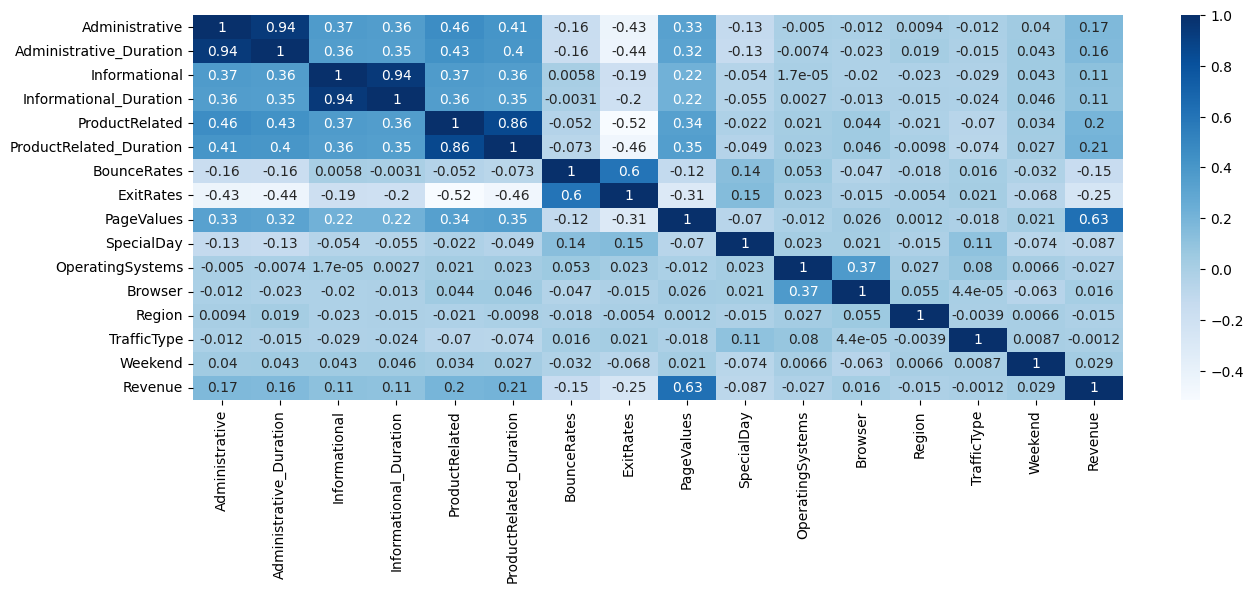

In [ ]:
corr = df.corr() # матрица корреляций Пирсона

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr, cmap="Blues", annot=True)

<ipython-input-47-c08e906b4555>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman') # матрица корреляций Cпирмена


<Axes: >

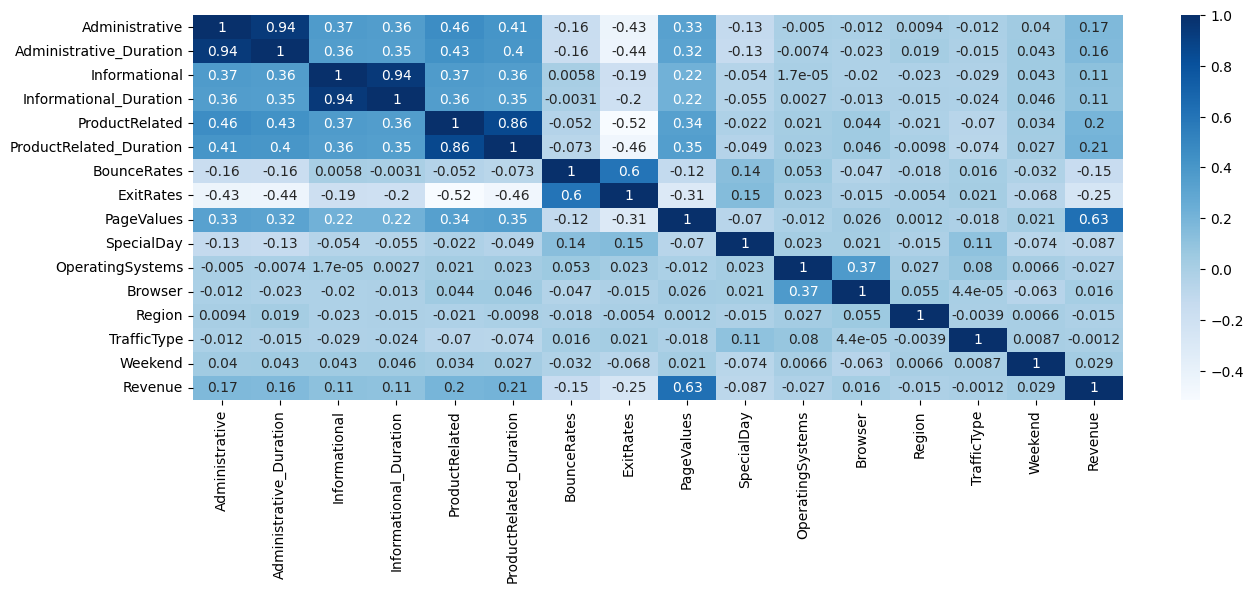

In [ ]:
corr = df.corr(method='spearman') # матрица корреляций Cпирмена

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr, cmap="Blues", annot=True)

<ipython-input-48-063a04fbfdf3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall') # матрица корреляций Кендалла


<Axes: >

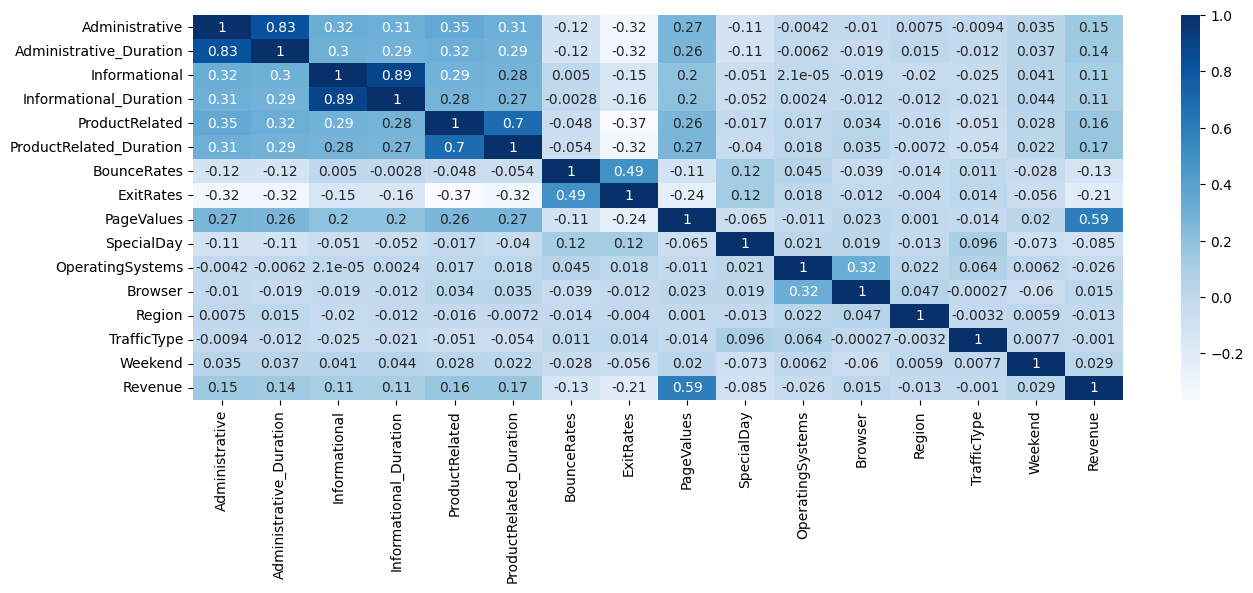

In [ ]:
corr = df.corr(method='kendall') # матрица корреляций Кендалла

fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr, cmap="Blues", annot=True)

## Применение метода ANOVA

Далее проведём корреляционный анализ нашей целевой переменной с категориальными признаками, применив статистический метод ANOVA.

In [7]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
5,Month,ProductRelated_Duration,Yes
6,Month,BounceRates,Yes
7,Month,ExitRates,Yes
8,Month,PageValues,Yes
9,Month,SpecialDay,Yes


## V-мера Крамера

Далее проведём корреляционный анализ между категориальными и категориальными признаками, используя V-меру Крамера.

In [9]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [10]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Month,VisitorType
Month,1.000000,0.140505
VisitorType,0.140505,1.000000


Предварительный вывод по анализу наших данных: наша целевая переменная `Bounce Rates`, согласно построенным матрицам корреляций, имеет корреляцию со следующими числовыми признаками: `Administrative`, `Administrative Duration`, `Product Related` (лежит на нижней границе), `Product Related Duration` (в том числе), `Exit Rates` (потому что эти два признака вытекают один из другого), `Special Day` и `Revenue`.

Так же через V-меру Крамера видим корреляцию между всеми числовыми и категориальными признаками, а так же видим корреляцию между двумя категориальными признаками (`Month` и `Visitor Type`).

# 4.Проведение анализа целевой переменной

## Распределение данных

 Далее построим Scatter Plot между нашей целевой переменной и числового признака. Основное внимание уделим следующим признакам: `Administrative Duration`, `Product Related Duration`, `Special Day`, `Revenue`.

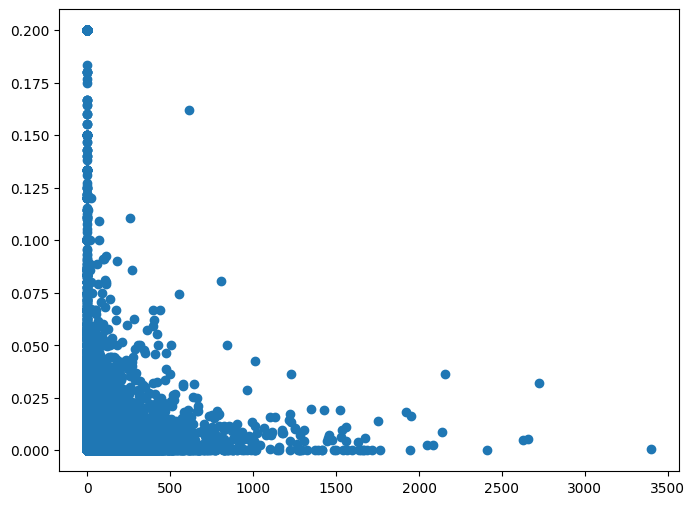

In [14]:
# Scatter Plot  между признаками Administrative Duration и Bounce Rates
plt.figure(figsize=(8,6))

plt.scatter(df.Administrative_Duration, df.BounceRates);

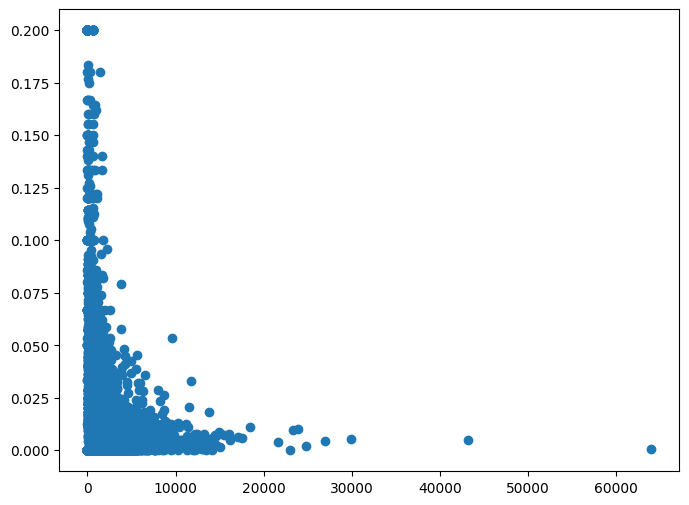

In [15]:
# Scatter Plot  между признаками Product Related Duration и Bounce Rates
plt.figure(figsize=(8,6))

plt.scatter(df.ProductRelated_Duration, df.BounceRates);

### Исследование величины Exit Rates

Так как у нас есть сильная корреляция с величиной `Exit Rates`, то для наглядности построим гистограмму и Scatter Plot и для этой переменной, которую мы временно возьмём в качестве целевой.

`Exit Rates` - процент просмотров определенной страницы, которые оказались последними в сеансе. То есть такие пользователи видели более одной страницы и потом ушли (Показатель выходов).

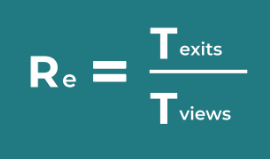

*Re* - показатель `Exit Rates`,
*T(exits)* - число выходов со страницы,
*T(views)* - число сеансов страницы.

<Axes: xlabel='ExitRates', ylabel='Count'>

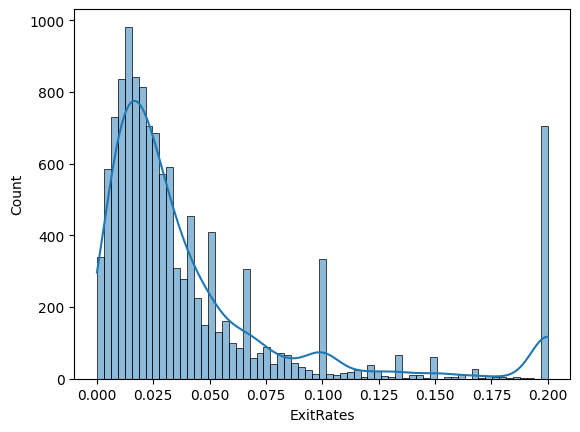

In [62]:
# Построим гистограмму для Exit Rates
sns.histplot(data = df.ExitRates, kde = True)

`Exit Rates` так же имеет логонормальное распределение со смещением влево, но мы так же наблюдаем, что имеется сильный выброс примерно на значении 0.2. Разделим наблюдения на две категории (от 0.18 по 0.2) и на (от 0 включительно по 0.1) и посчитаем их доли.

In [69]:
len(df.ExitRates[(df.ExitRates > 0.18) & (df.ExitRates <= 0.2)]) / len(df.ExitRates) * 100

5.7988645579886455

In [70]:
len(df.ExitRates[(df.ExitRates >= 0) & (df.ExitRates <= 0.1)]) / len(df.ExitRates) * 100

90.2757502027575

Получили, что около 90% приходится на категорию (от 0 включительно до 0.1 включительно).

Так как по матрице корреляций, у нас наблюдается корреляция с величинами, характеризующими длительность времяпровождения на нашем сайте, построим, соответственно, Scatter Plot с одной из длительностей, например, с `Administrative Duration`.

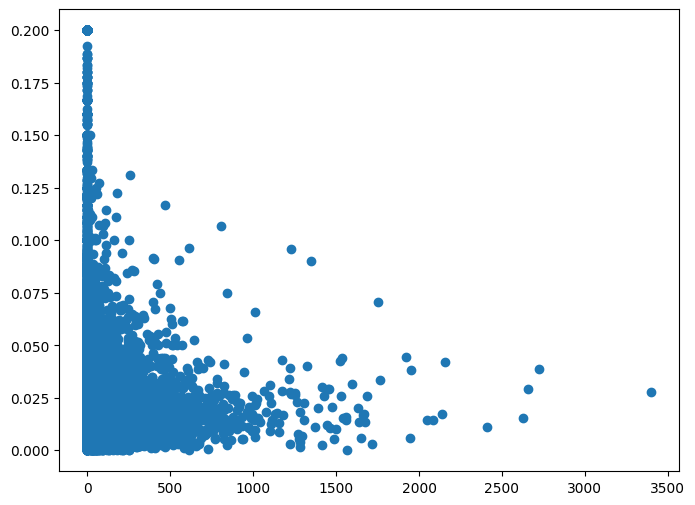

In [73]:
# Scatter Plot  между признаками Administrative Duration и Exit Rates
plt.figure(figsize=(8,6))

plt.scatter(df.Administrative_Duration, df.ExitRates);

В целом, наблюдаем похожую картину: логонормальное распределение со смещением влево.

Как мы видим, наши распределение наших данных по целевой переменной `Bounce Rates` и переменной `Exit Rates` имеет неоднородную структуру, а именно логонормальное распределение, данные смещены влево.

О чём может говорить такое логонормальное данных:


*   Оно может указывать на особенности поведения пользователей: непривлекательность сайта, либо, например, пользователь открывает лишь страницу "Контакты", где есть необходимая информация, и удаляется, либо наш сайт и представляет собой лишь одну страницу;
*   Неоднородность данных: логонормальное распределение наших данных может свидетельствовать о наличии неоднородности. Например, возможно, разные группы пользователей имеют разные паттерны поведения, что и приводит к такому распределению.



## Категории пользователей

Проведём более подробный анализ и посмотрим, какое число каких категорий пользователей посещает наш сайт.

In [19]:
# Покажем на экране, какие вообще категории пользователей у нас есть
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

Как мы видим, у нас три категории пользователей. Далее выясним долю каждой категории во всех посещениях нашего сайта.

In [26]:
for client_type in df.VisitorType.unique():
  print(client_type + ':', len(df[(df.VisitorType == client_type)]) / len(df) * 100)

Returning_Visitor: 85.57177615571776
New_Visitor: 13.738848337388484
Other: 0.689375506893755


Мы видим, что подавляющее большинство наших пользователей - `Returning Visitor` (постоянный пользователь), но логонормальное распределение со смещением влево говорит о том, что пользователи очень мало времени проводят на нашем сайте.

О чём это может свидетельствовать:


*   Наш сайт мог перестать быть интересным для пользователей, хотя у нас накопилась солидная аудитория;
*   У нас имеется лишь одна страница, например, это может быть сайт брокера или сайт, который широко использует в своём арсенале средства AJAX, поэтому другие страницы нам и не нужны, кроме разве что лицензионного соглашения и правил сайта;
*   Неоднородность данных, как уже было сказано в выводе выше.





## Построение линейной модели

Попробуем обучить линейную модель с использованием линейной регрессии и посмотрим на результаты.
В качество объекта-признака возьмём `Administrative Duration`.

In [30]:
X = df[['Administrative_Duration']] # матрица объект-признак
y = df['BounceRates'] # целевая переменная

In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # объявляем модель
lr.fit(X, y) # обучаем модель (подбор параметров)

pred = lr.predict(X)

In [32]:
y[:10]

0    0.200000
1    0.000000
2    0.200000
3    0.050000
4    0.020000
5    0.015789
6    0.200000
7    0.200000
8    0.000000
9    0.000000
Name: BounceRates, dtype: float64

In [33]:
pred[:10]

array([0.02538728, 0.02538728, 0.02538728, 0.02538728, 0.02538728,
       0.02538728, 0.02538728, 0.02538728, 0.02538728, 0.02538728])

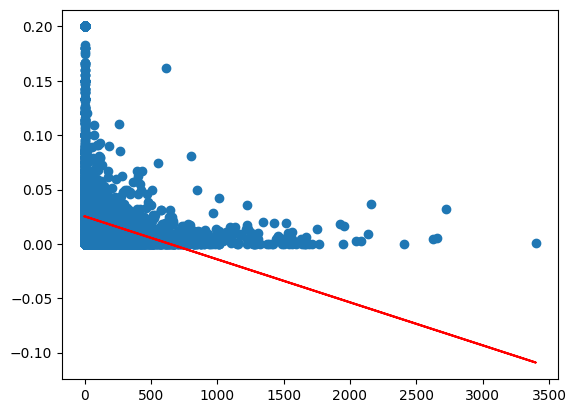

In [34]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

На графике отчётливо видим, что линия регрессии падает вниз и выходит за пределы нашего графика. Это мож

Вычислим ошибку (МАЕ) нашей модели.

In [35]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred)

0.02887602449961194

In [36]:
np.mean(y)

0.02219138047072182

Как мы видим, у нас очень сильный показатель МАЕ, что не есть хорошо при обучении модели.

Так же для наглядности построим модель для величины `Exit Rates`.

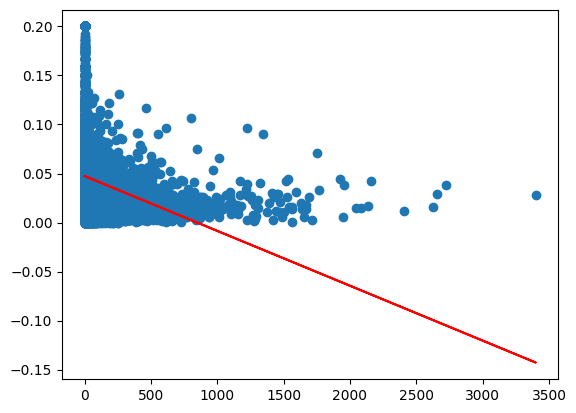

In [78]:
X1 = df[['Administrative_Duration']] # матрица объект-признак
y1 = df['ExitRates'] # целевая переменная

from sklearn.linear_model import LinearRegression

lr = LinearRegression() # объявляем модель
lr.fit(X1, y1) # обучаем модель (подбор параметров)

pred = lr.predict(X1)

plt.scatter(X1.values, y1)
plt.plot(X1.values, pred, c='red')

Так же рассчитаем МАЕ для `Exit Rates`.

In [79]:
mean_absolute_error(y1, pred)

0.03244339280372287

In [80]:
np.mean(y1)

0.04287747823844282

Видим, что ситуация в целом очень похожая: MAE одинаково высок у обоих величин - `Bounce Rates` и `Exit Rates`.

О чём это может говорить:


*   Несоответствие модели: возможно, наши данные имеют нелинейную зависимость, и следует использовать другую модель, например, полиномиальную регрессию или модели, основанные на деревьях решений;
*   Несбалансированные данные или выбросы: возможно, наличие сильных выбросов и повлияло на апроксимацию нашей модели, следует, может быть, использовать более устойчивую к выбросам модель;
*   Проблемы с масштабированием данных: вероятно, предикторы имеют более больший масштаб, чем наша целевая переменная, поэтому следует использовать метод стандартизации или нормализации.






Так же, вполне вероятно, требуется более углублённый и детальный анализ с остальными признаками, которые не показали корреляции с нашей целевой переменной, так как, согласно теории, нулевая корреляция не говорит нам о том, что две величины независимы между собой.

# 5.Проведение экспериментов

В данном пункте попробуем увеличить наш датасет до 1_000_000 строк методом дублирования и проведём сравнение скорости работы Pandas и Polars на таком датасете.

In [40]:
df_big = df.copy()

for i in range(100):
  df_big = pd.concat([df_big, df])

df_big.to_csv("online_shoppers_intention_big.csv", index=False)

In [41]:
df_big.shape, df.shape

((1245330, 18), (12330, 18))

Теперь в нашем распоряжении имеется 1_245_330 элементов

In [42]:
# установим и импортируем библиотеку Polars
!pip install polars

import polars as pl

## Загрузка


In [43]:
# Polars

%%time

df_pl = pl.read_csv("online_shoppers_intention_big.csv")

CPU times: user 1.58 s, sys: 421 ms, total: 2 s
Wall time: 1.35 s


In [56]:
# Pandas

%%time

df_big = pd.read_csv("online_shoppers_intention_big.csv")

CPU times: user 2.43 s, sys: 322 ms, total: 2.75 s
Wall time: 2.86 s


При проведении загрузки Polars немного опережает Pandas.

## Выбор и фильтрация данных

In [47]:
#Polars - Выбор данных

%%time

df_pl[['Administrative_Duration', 'BounceRates']]

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 10.7 ms


Administrative_Duration,BounceRates
f64,f64
0.0,0.2
0.0,0.0
0.0,0.2
0.0,0.05
0.0,0.02
0.0,0.015789
0.0,0.2
0.0,0.2
0.0,0.0


In [55]:
#Pandas - Выбор данных

%%time

df_big[['Administrative_Duration', 'BounceRates']]

CPU times: user 6.61 ms, sys: 50 µs, total: 6.66 ms
Wall time: 14.3 ms


,Administrative_Duration,BounceRates
0,0.0,0.200000
1,0.0,0.000000
2,0.0,0.200000
3,0.0,0.050000
4,0.0,0.020000
...,...,...
12325,145.0,0.007143
12326,0.0,0.000000
12327,0.0,0.083333
12328,75.0,0.000000


In [53]:
# Polars - Фильтрация
%%time

df_pl.filter(pl.col('BounceRates') > 0.01)

CPU times: user 147 ms, sys: 33 ms, total: 180 ms
Wall time: 196 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,1,1,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,"""Feb""",3,2,2,4,"""Returning_Visi…",false,false
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visi…",true,false
0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,"""Feb""",2,2,1,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,"""Feb""",2,4,3,3,"""Returning_Visi…",false,false
1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,2,1,5,"""Returning_Visi…",true,false
0,0.0,0,0.0,16,407.75,0.01875,0.025833,0.0,0.4,"""Feb""",1,1,4,3,"""Returning_Visi…",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,4,3,"""Returning_Visi…",false,false


In [54]:
# Pandas - Фильтрация
%%time

df_big.query('BounceRates > 0.01')

CPU times: user 138 ms, sys: 23.2 ms, total: 162 ms
Wall time: 259 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12314,0,0.0,0,0.0,7,705.833333,0.028571,0.085714,0.0,0.0,Dec,5,11,4,1,Returning_Visitor,True,False
12316,0,0.0,0,0.0,44,615.000000,0.013636,0.036364,0.0,0.0,Dec,4,1,3,1,Returning_Visitor,False,False
12320,0,0.0,0,0.0,8,143.583333,0.014286,0.050000,0.0,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.0,0,0.0,6,0.000000,0.200000,0.200000,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,False


Polars значительно опережает Pandas касательно фильтрации и выбора данных.

## Аггрегация данных

In [93]:
# Pandas

%time

df_big.groupby('Administrative_Duration').agg({'BounceRates' : 'mean', 'ExitRates' : 'median'})

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.58 µs


,BounceRates,ExitRates
Administrative_Duration,,
0.000000,0.038701,0.040476
1.333333,0.006061,0.011111
2.000000,0.021542,0.031400
3.000000,0.006621,0.017248
3.500000,0.000000,0.006506
...,...,...
2407.423810,0.000324,0.011249
2629.253968,0.004851,0.015431
2657.318056,0.005316,0.028971


In [94]:
%%time

df_pl.groupby('Administrative_Duration').agg([pl.mean('BounceRates'), pl.median('ExitRates')])

CPU times: user 67.7 ms, sys: 11 ms, total: 78.7 ms
Wall time: 57.9 ms


Administrative_Duration,BounceRates,ExitRates
f64,f64,f64
227.375,0.0,0.014854
133.583333,0.014414,0.025811
209.5,0.025899,0.036039
167.5,0.0,0.026389
69.4,0.0,0.002381
40.5,0.00161,0.016667
419.179525,0.0128,0.024809
39.8,0.00137,0.010018
121.4,0.05787,0.080562


In [87]:
# lazy operations - Polars
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Browser')
    .agg(
        [
            pl.col('BounceRates').mean(),
            pl.col('ExitRates').median()
        ]
    )
)

CPU times: user 177 µs, sys: 21 µs, total: 198 µs
Wall time: 202 µs


In [89]:
%%time
q.collect()

CPU times: user 50.8 ms, sys: 1.82 ms, total: 52.7 ms
Wall time: 69.9 ms


Browser,BounceRates,ExitRates
i64,f64,f64
2,0.021365,0.025
8,0.031124,0.034661
4,0.017155,0.024031
10,0.014914,0.022222
6,0.018483,0.027652
12,0.025857,0.027194
3,0.037603,0.032793
1,0.026173,0.026263
7,0.021283,0.025


Вывод: в итоге имеем, что Polars везде справился с задачам лучше, чем Pandas, однако его преимущество, в особенности касательно группировки данных и загрузки данных, незначительно.

# Выводы

Соберём все выводы в один раздел.

Исследовав величину `Bounce Rates` в качестве целевой переменной, а так же для наглядости `Exit Rates`, с которой она связана по формуле и коррелирует, имеем следующее:

*   У нас логонормальное распределение, которое может являться таковым ввиду многих причин: неоднородность данных, особенности сайта либо утрата интереса пользователей к нашему сайту (число постоянных пользователей - абсолютное большинство (около 85%));
*   MAE нашей линейной модели показывает высокие значения при взятии в качестве целевой переменной `Bounce Rates` и `Exit Rates`, это может быть связанно ввиду следующих причин: неустойчивость модели к выбросам, несбалансированые данные или проблемы с масштабированием;
*   Как и ожидалось, после увеличения нашего датасета до более чем 1_000_000 значений библиотека Polars везде лидирует, но при группировки и загрузки данных выигрывает незначительно.



